# <h1 style="color: teal">TEMPERATURE PREDICTION USING WEATHER VARIABLES</h1>

---







<h1><span style="color=: teal">INDEX :</span></h1>

I. [INTRODUCTION]

II. [DATA CLEANING]

III. [ELABORATORY DATA ANALYSIS]
- [Corelattion in Data]
- [Data Visualization]

IV. [PREDICTING APPARENT TEMPERATURE]

v. [SUMMARY]

# <h1><a id='1' style="color: teal">I. INTRODUCTION</a></h1>

Weather is the single most events that affect the human life in every dimension, ranging from food to fly and an important aspect of a person’s life as it can help us to know when it’ll rain and when it’ll be sunny. 


## <Li style="list-style-type: square"><span style="color: teal">Problem</span></Li>
Temperature is a primary factor affecting the rate of plant development. Warmer temperatures expected with climate change and the potential for more extreme temperature events will impact plant productivity.
In this project we trying to predict the temperature given other weather variables in an hourly manner.
## <Li style="list-style-type: square"><span style="color: teal">DATA COLLECTION</span></Li>
the dataset of weather was obtained from Kaggle.Through this dataset, we provide hourly historical weather data for all Saudi Arabia cities from 2017 to 2019 . Included a date for which you would like to see weather history such as temperature, wind, humidity, barometer, and visibility.[Dataset](https://www.kaggle.com/esraamadi/saudi-arabia-weather-history)

## <Li style="list-style-type: square"><span style="color: teal">Objective</span></li>
<li>Clean the data and drop useless columns.</li>
<li>Make a EDA report.</li>
<li>Visualize the distributions of various features and correlations between them.</li>
<li>Feature engineering to extract the correct features for the model.</li>
<li>Train a regression model to predict the temperature.</li>


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving weather-sa-2017-2019-clean.csv to weather-sa-2017-2019-clean.csv


In [4]:
# Loading weather_data.csv as in a variable named "data"
data = pd.read_csv('weather-sa-2017-2019-clean.csv',index_col=0)
# Showing First five elements.
data.head()

,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [5]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249023 entries, 0 to 2852
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city        249023 non-null  object 
 1   date        249023 non-null  object 
 2   time        249023 non-null  object 
 3   year        249023 non-null  int64  
 4   month       249023 non-null  int64  
 5   day         249023 non-null  int64  
 6   hour        249023 non-null  int64  
 7   minute      249023 non-null  int64  
 8   weather     249023 non-null  object 
 9   temp        249023 non-null  int64  
 10  wind        249023 non-null  int64  
 11  humidity    249006 non-null  object 
 12  barometer   248951 non-null  float64
 13  visibility  249023 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.5+ MB


In [6]:
data.shape

(249023, 14)

In [7]:
data.size

3486322

In [11]:
#Reading Column Names
list(data.columns)

['city',
 'date',
 'time',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'weather',
 'temp',
 'wind',
 'humidity',
 'barometer',
 'visibility']

**List of the cities used in the **data**-set.**

In [10]:
city = data.city
city= set(city)
city

{'Assir',
 'Baha',
 'EP',
 'Hail',
 'Jawf',
 'Jazan',
 'Madina',
 'Mecca',
 'Najran',
 'Northern boarder',
 'Qassim',
 'Riyadh',
 'Tabuk'}

In [12]:
data.describe()

,year,month,day,hour,minute,temp,wind,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,248951.000000,249023.000000
mean,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,1015.455355,11.053453
std,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,6.970779,7.053005
min,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,904.000000,-1.000000
25%,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,1011.000000,5.000000
50%,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,1016.000000,16.000000
75%,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,1021.000000,16.000000
max,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,1101.000000,161.000000


# <h1><a id="2" style="color: teal">II. DATA CLEANING</a></h1>

## <Li style="list-style-type: square"><span style="color: teal">Statement:</span></Li>
<li>Perform data cleaning using pandas library. Which includes replacing the miscoded information and handling missing data.</li>

In [13]:
# information of data before cleaning.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249023 entries, 0 to 2852
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city        249023 non-null  object 
 1   date        249023 non-null  object 
 2   time        249023 non-null  object 
 3   year        249023 non-null  int64  
 4   month       249023 non-null  int64  
 5   day         249023 non-null  int64  
 6   hour        249023 non-null  int64  
 7   minute      249023 non-null  int64  
 8   weather     249023 non-null  object 
 9   temp        249023 non-null  int64  
 10  wind        249023 non-null  int64  
 11  humidity    249006 non-null  object 
 12  barometer   248951 non-null  float64
 13  visibility  249023 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.5+ MB


In [14]:
#Changing the column names
data=data.rename(columns={'barometer':'Pressure(barometer)',})
data.columns

Index(['city', 'date', 'time', 'year', 'month', 'day', 'hour', 'minute',
       'weather', 'temp', 'wind', 'humidity', 'Pressure(barometer)',
       'visibility'],
      dtype='object')

In [15]:
#dropping unnecessary Columns. (which includes text.)
cols = ['weather']
data = data.drop(cols,axis=1)

In [16]:
# Converting Formatted Date from Object to DateTimeObject.
data['date'] = pd.to_datetime(data['date'])
data['time'] = pd.to_datetime(data['time'])
data['hour'] = pd.to_datetime(data['hour'])
data['minute'] = pd.to_datetime(data['minute'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249023 entries, 0 to 2852
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   city                 249023 non-null  object        
 1   date                 249023 non-null  datetime64[ns]
 2   time                 249023 non-null  datetime64[ns]
 3   year                 249023 non-null  int64         
 4   month                249023 non-null  int64         
 5   day                  249023 non-null  int64         
 6   hour                 249023 non-null  datetime64[ns]
 7   minute               249023 non-null  datetime64[ns]
 8   temp                 249023 non-null  int64         
 9   wind                 249023 non-null  int64         
 10  humidity             249006 non-null  object        
 11  Pressure(barometer)  248951 non-null  float64       
 12  visibility           249023 non-null  int64         
dtypes: datetime64[ns

In [17]:
#Remove the NaN values from the dataset
data.isnull().sum()

city                    0
date                    0
time                    0
year                    0
month                   0
day                     0
hour                    0
minute                  0
temp                    0
wind                    0
humidity               17
Pressure(barometer)    72
visibility              0
dtype: int64

In [18]:
data.dropna(how='any',inplace=True)
data.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248946 entries, 0 to 2852
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   city                 248946 non-null  object        
 1   date                 248946 non-null  datetime64[ns]
 2   time                 248946 non-null  datetime64[ns]
 3   year                 248946 non-null  int64         
 4   month                248946 non-null  int64         
 5   day                  248946 non-null  int64         
 6   hour                 248946 non-null  datetime64[ns]
 7   minute               248946 non-null  datetime64[ns]
 8   temp                 248946 non-null  int64         
 9   wind                 248946 non-null  int64         
 10  humidity             248946 non-null  object        
 11  Pressure(barometer)  248946 non-null  float64       
 12  visibility           248946 non-null  int64         
dtypes: datetime64[ns

In [19]:
# Indexing according to date and time.
idata = data.sort_values(by=['date','time'])

In [20]:
# Setting Index
idata = idata.set_index('date','time')
idata.index

DatetimeIndex(['2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-01', '2017-01-01',
               ...
               '2019-04-30', '2019-04-30', '2019-04-30', '2019-04-30',
               '2019-04-30', '2019-04-30', '2019-04-30', '2019-04-30',
               '2019-04-30', '2019-04-30'],
              dtype='datetime64[ns]', name='date', length=248946, freq=None)

In [21]:
#removing duplicate values in the index
idata.index.drop_duplicates(keep='first')

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2019-04-21', '2019-04-22', '2019-04-23', '2019-04-24',
               '2019-04-25', '2019-04-26', '2019-04-27', '2019-04-28',
               '2019-04-29', '2019-04-30'],
              dtype='datetime64[ns]', name='date', length=850, freq=None)

In [22]:
# data after cleaning
idata.dropna()
idata.head()

,city,time,year,month,day,hour,minute,temp,wind,humidity,Pressure(barometer),visibility
date,,,,,,,,,,,,
2017-01-01,Qassim,2020-11-17,2017,1,1,1970-01-01 00:00:00.000000024,1970-01-01,17,11,64%,1018.0,16
2017-01-01,Hail,2020-11-17,2017,1,1,1970-01-01 00:00:00.000000024,1970-01-01,17,11,64%,1018.0,16
2017-01-01,Madina,2020-11-17,2017,1,1,1970-01-01 00:00:00.000000024,1970-01-01,21,0,33%,1020.0,16
2017-01-01,EP,2020-11-17,2017,1,1,1970-01-01 00:00:00.000000024,1970-01-01,16,0,72%,1015.0,16
2017-01-01,Mecca,2020-11-17,2017,1,1,1970-01-01 00:00:00.000000024,1970-01-01,22,7,69%,1016.0,16


In [23]:
# information of data after after cleaning.
idata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248946 entries, 2017-01-01 to 2019-04-30
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   city                 248946 non-null  object        
 1   time                 248946 non-null  datetime64[ns]
 2   year                 248946 non-null  int64         
 3   month                248946 non-null  int64         
 4   day                  248946 non-null  int64         
 5   hour                 248946 non-null  datetime64[ns]
 6   minute               248946 non-null  datetime64[ns]
 7   temp                 248946 non-null  int64         
 8   wind                 248946 non-null  int64         
 9   humidity             248946 non-null  object        
 10  Pressure(barometer)  248946 non-null  float64       
 11  visibility           248946 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(6), object(2)
me

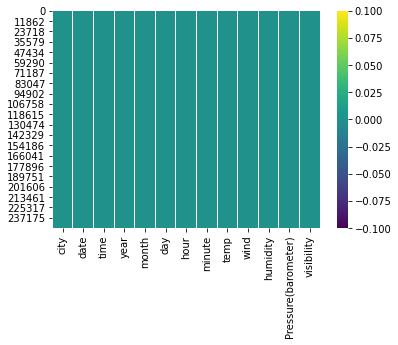

In [24]:
sns.heatmap(data.isnull(), cmap="viridis")

<h1><a id="3" style="color:teal">III. 
EXPLORATORY DATA ANALYSIS(EDA)</a></h1>

## <Li style="list-style-type: square"><span style="color: teal">Statement:</span></Li>
<li>Make a Exploratory Data Analysis on the data using pandas.</li>
<li>Visualize distributions and correlation of features using seaborn and pandas</li>

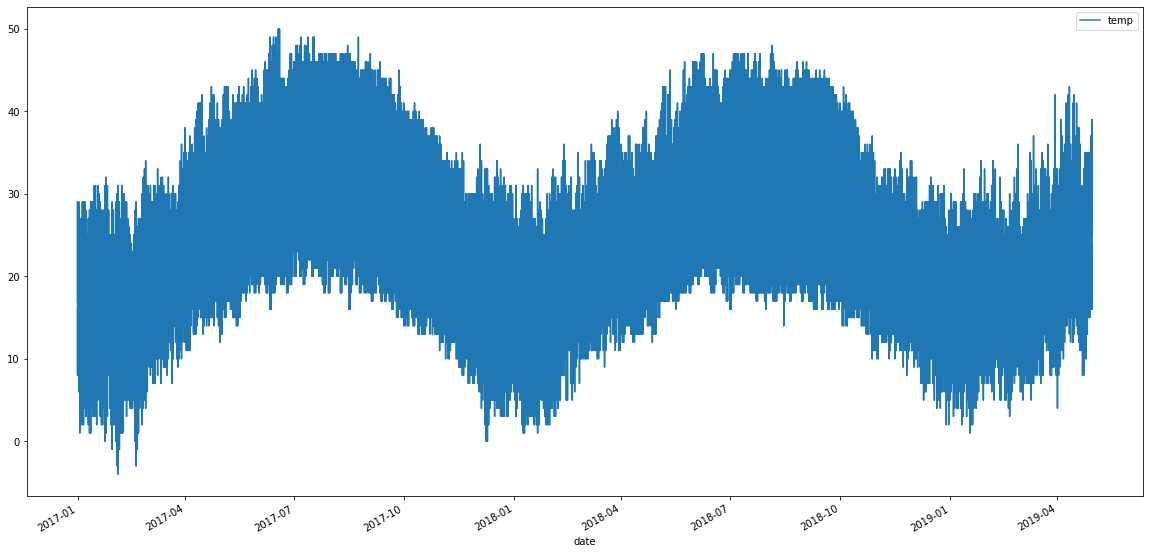

In [25]:
#plotting the data
idata.plot(y="temp",figsize=(20,10))

## As you see, the graph is too congested. We Resample the data in days

In [26]:
#resampling the data into day format
idata2 = idata.resample(rule='D').mean()
idata2.head()

,year,month,day,temp,wind,Pressure(barometer),visibility
date,,,,,,,
2017-01-01,2017.0,1.0,1.0,16.789286,11.021429,1020.889286,12.528571
2017-01-02,2017.0,1.0,2.0,16.628159,11.075812,1020.801444,9.768953
2017-01-03,2017.0,1.0,3.0,15.558394,10.649635,1021.981752,14.142336
2017-01-04,2017.0,1.0,4.0,15.084806,10.508834,1021.752650,14.600707
2017-01-05,2017.0,1.0,5.0,14.494585,11.935018,1022.891697,14.873646


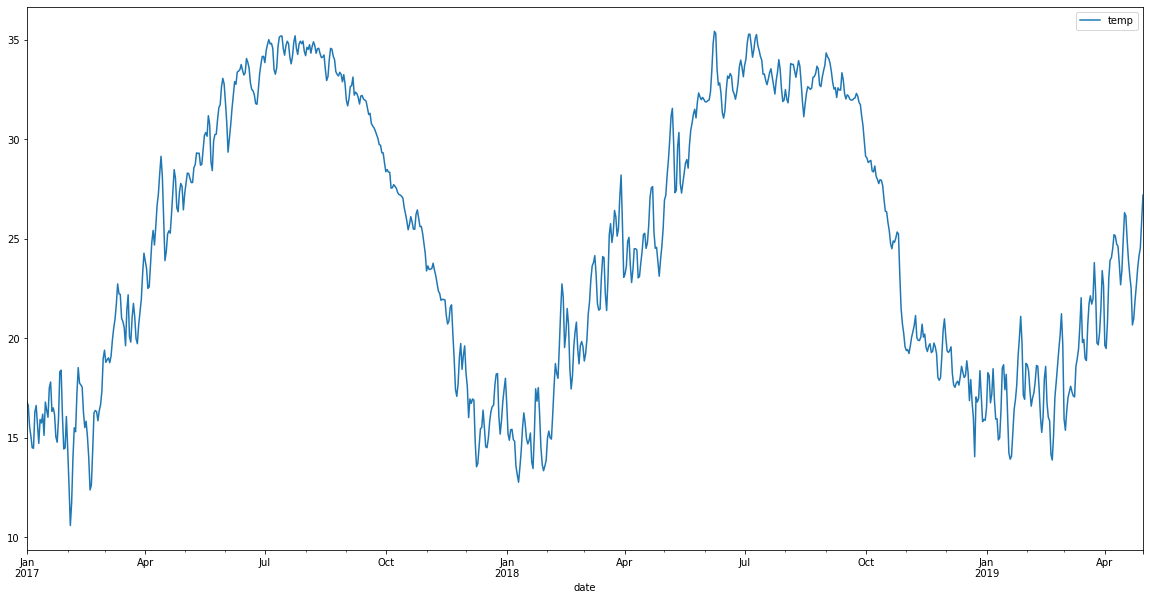

In [27]:
idata2.plot(y="temp",figsize=(20,10))

## <h1 style="color:teal">Taking data of october month only.</h1>

In [28]:
#extracting data from the month of oct
oct2018 = idata['2018-01-01':'2018-01-31']
oct2018

,city,time,year,month,day,hour,minute,temp,wind,humidity,Pressure(barometer),visibility
date,,,,,,,,,,,,
2018-01-01,Qassim,2020-11-17 00:00:00,2018,1,1,1970-01-01 00:00:00.000000024,1970-01-01,14,7,41%,1019.0,16
2018-01-01,Hail,2020-11-17 00:00:00,2018,1,1,1970-01-01 00:00:00.000000024,1970-01-01,14,7,41%,1019.0,16
2018-01-01,Madina,2020-11-17 00:00:00,2018,1,1,1970-01-01 00:00:00.000000024,1970-01-01,23,17,50%,1017.0,16
2018-01-01,Mecca,2020-11-17 00:00:00,2018,1,1,1970-01-01 00:00:00.000000024,1970-01-01,25,13,74%,1013.0,-1
2018-01-01,Tabuk,2020-11-17 00:00:00,2018,1,1,1970-01-01 00:00:00.000000024,1970-01-01,11,7,50%,1016.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-31,Northern boarder,2020-11-17 23:00:00,2018,1,31,1970-01-01 00:00:00.000000023,1970-01-01,10,13,35%,1023.0,16
2018-01-31,Jazan,2020-11-17 23:00:00,2018,1,31,1970-01-01 00:00:00.000000023,1970-01-01,10,9,88%,1024.0,16
2018-01-31,Najran,2020-11-17 23:00:00,2018,1,31,1970-01-01 00:00:00.000000023,1970-01-01,11,7,58%,1024.0,-1


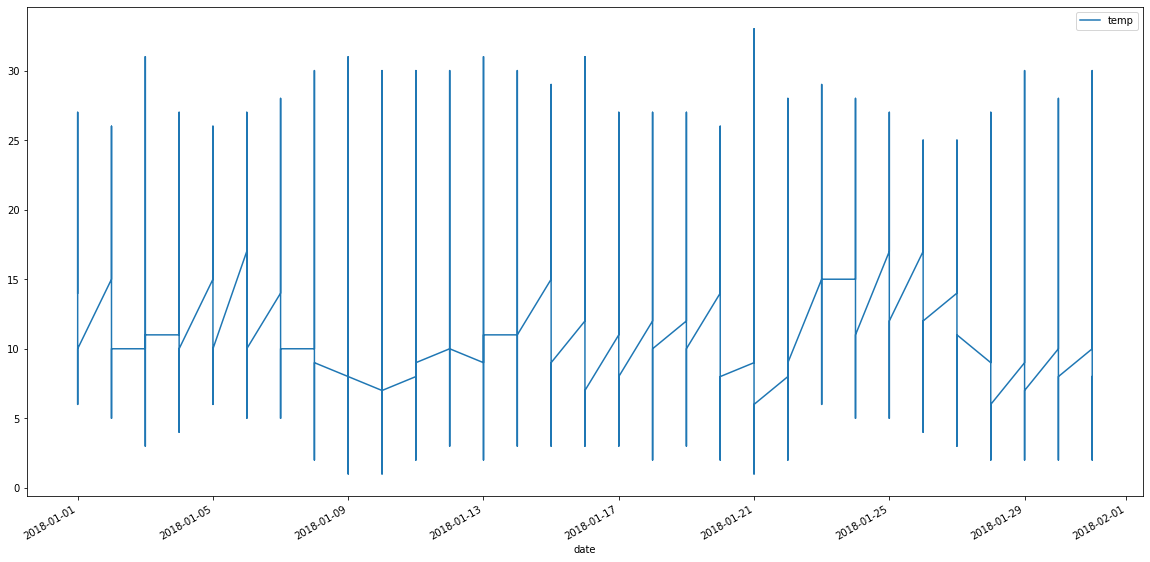

In [29]:
oct2018.plot(y=['temp'],kind='line',figsize=(20,10))

## As you see, the graph is too congested. We Resample the data in days.




In [31]:
#resampling
october = oct2018.resample(rule='D').mean()
october.head()

,year,month,day,temp,wind,Pressure(barometer),visibility
date,,,,,,,
2018-01-01,2018.0,1.0,1.0,16.710843,15.052209,1016.839357,9.293173
2018-01-02,2018.0,1.0,2.0,15.194444,13.123016,1018.373016,11.519841
2018-01-03,2018.0,1.0,3.0,14.875000,10.476562,1019.539062,11.621094
2018-01-04,2018.0,1.0,4.0,15.404580,10.740458,1018.148855,11.328244
2018-01-05,2018.0,1.0,5.0,15.420635,13.329365,1016.837302,11.646825


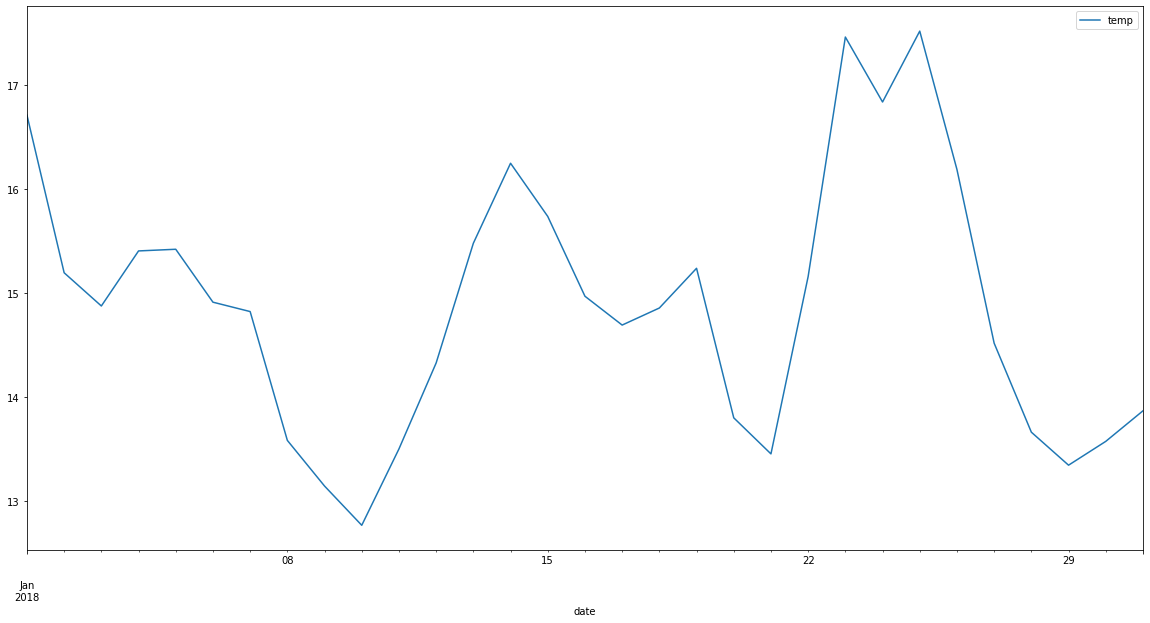

In [32]:
october.plot(y=['temp'],kind='line',figsize=(20,10))

## <h1 style="color: teal">Now Plotting as per Seasons.</h1>

In [33]:
winter = idata2['2018-01-01':'2018-02-28']
winter2 = idata2['2018-12-01':'2018-12-31']
spring = idata2['2018-03-01':'2018-05-31']
summer = idata2['2018-06-01':'2018-08-31']

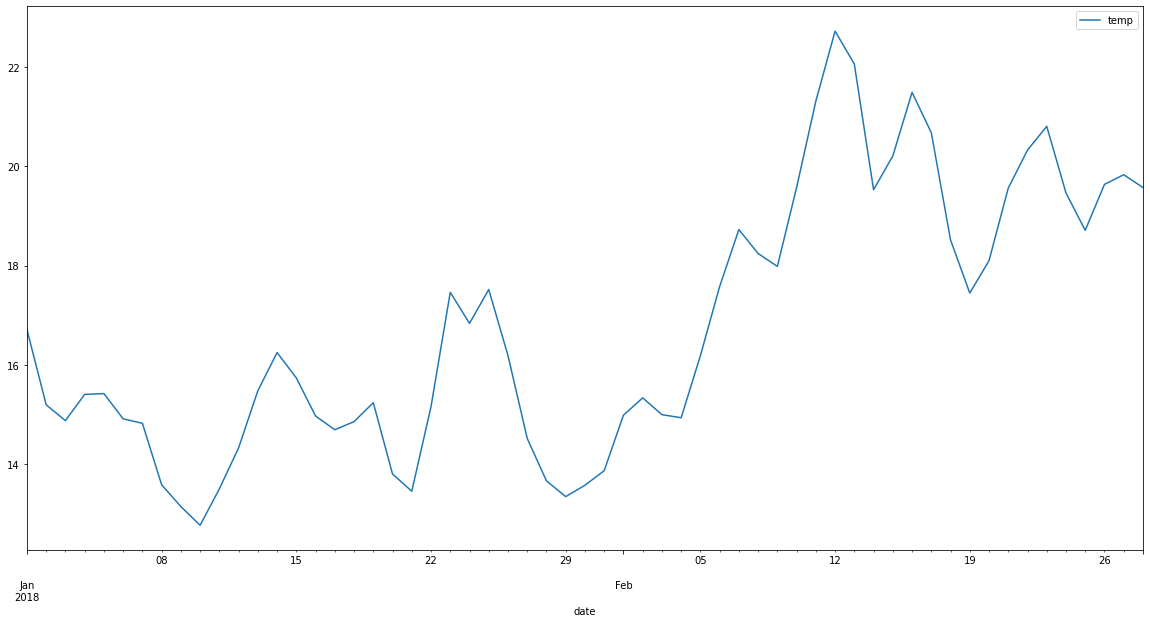

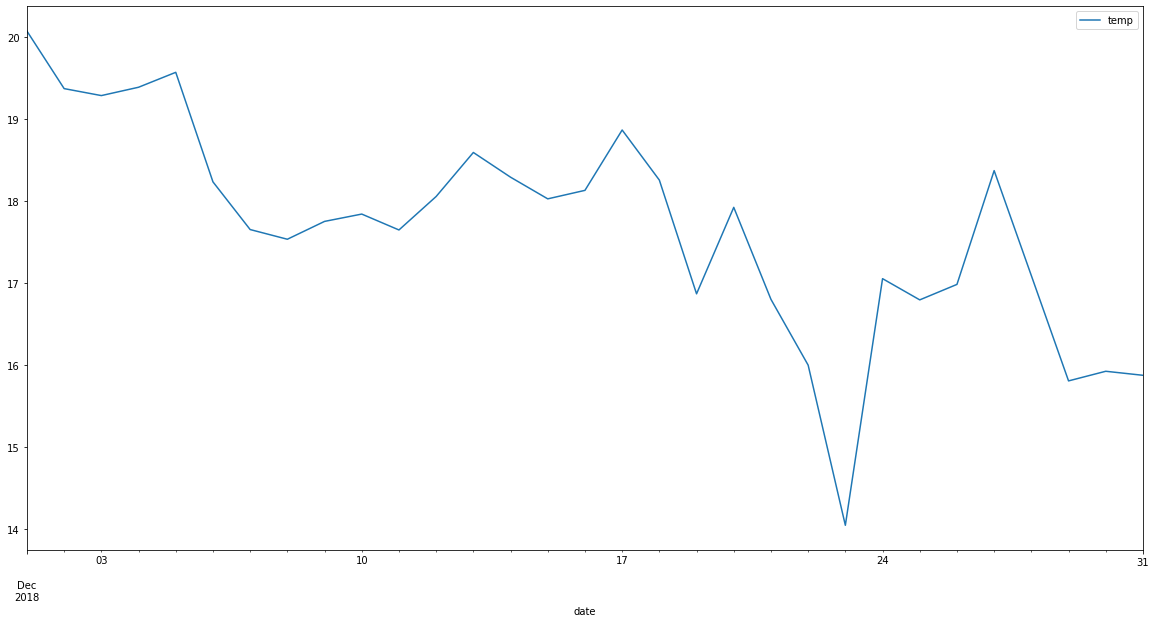

In [34]:
winter.plot(y= ['temp'],figsize=(20,10))
winter2.plot(y= ['temp'],figsize=(20,10))

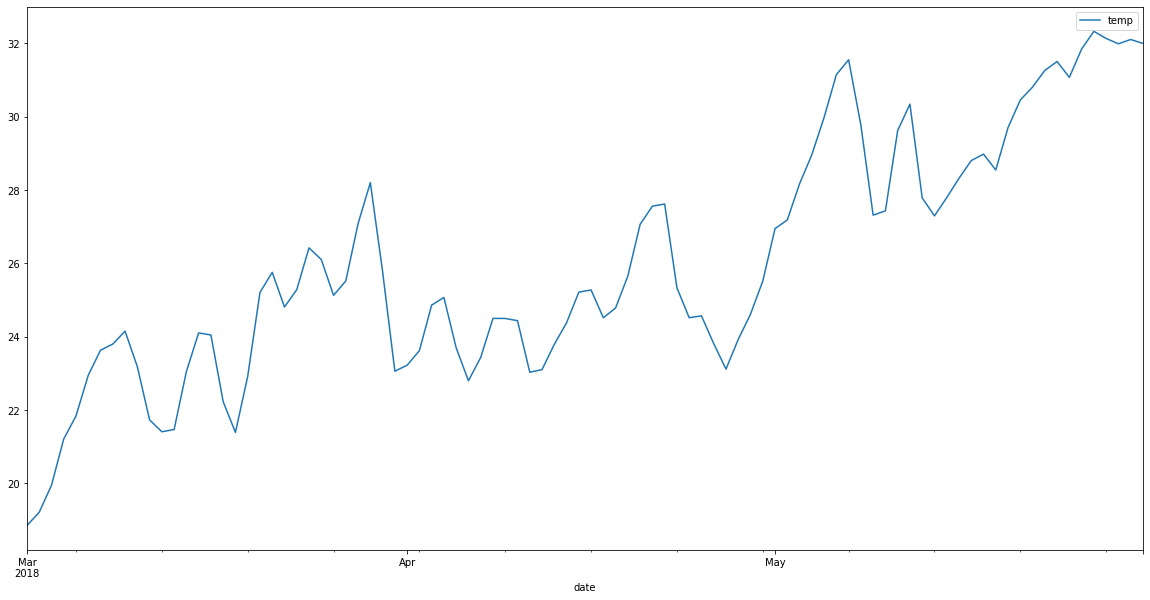

In [35]:
spring.plot(y= ['temp'],figsize=(20,10))

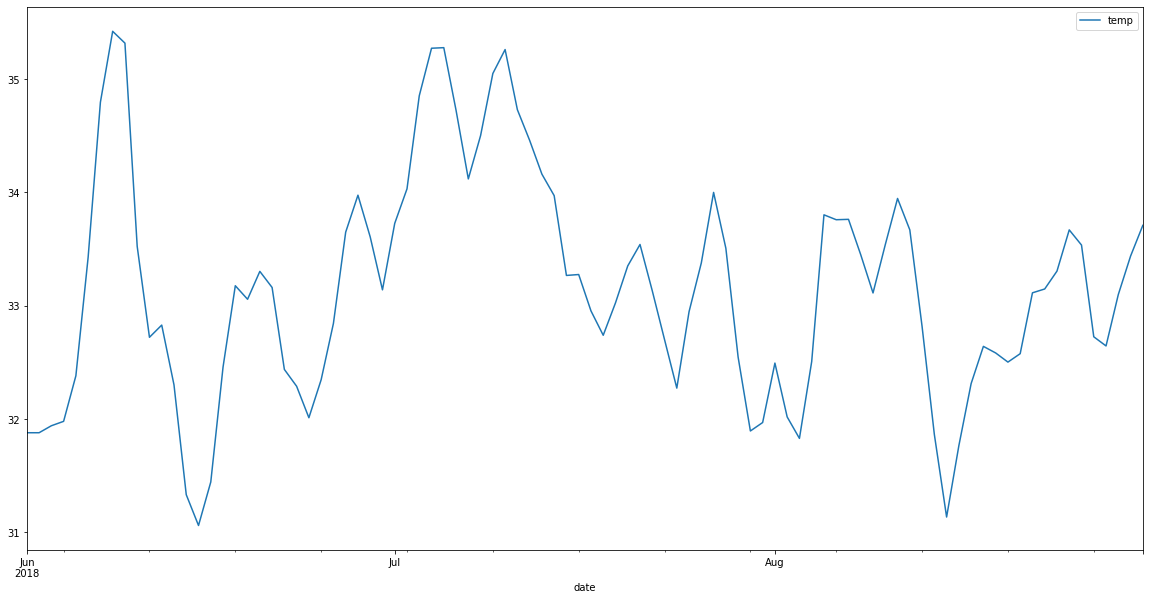

In [36]:
summer.plot(y= ['temp'],figsize=(20,10))

<h1><a id="31" style="color: teal">Correlation in data</a></h1>


Correlation verification is an important part of an exploratory data analysis process. We want to identify and predict the features that influence variables.
 the value of the correlation coefficient varies between +1 and -1.  A value of ± 1 indicates a perfect degree of association between the two variables.  As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker.  The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a – sign indicates a negative relationship. 


There are three reasons for computing a correlation matrix:
1.   To summarize a large amount of data where the goal is to see patterns. 
2.   To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

Pandas **corr()** is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. we Use it to find the correlation among the columns in the dataframe using ‘Pearson’ method.

**Pearson r correlation:** Pearson r correlation is the most widely used correlation statistic to measure the degree of the relationship between linearly related variables. 








In [37]:
#checking correlation between the cols
data.corr(method ='pearson')

,year,month,day,temp,wind,Pressure(barometer),visibility
year,1.000000,-0.311511,-0.010121,-0.184419,0.045449,0.088874,-0.064814
month,-0.311511,1.000000,0.012751,0.225076,-0.100294,-0.052223,0.020869
day,-0.010121,0.012751,1.000000,0.021451,0.017182,-0.002518,-0.024024
temp,-0.184419,0.225076,0.021451,1.000000,0.238074,-0.681923,-0.001856
wind,0.045449,-0.100294,0.017182,0.238074,1.000000,-0.134896,-0.210586
Pressure(barometer),0.088874,-0.052223,-0.002518,-0.681923,-0.134896,1.000000,-0.033053
visibility,-0.064814,0.020869,-0.024024,-0.001856,-0.210586,-0.033053,1.000000


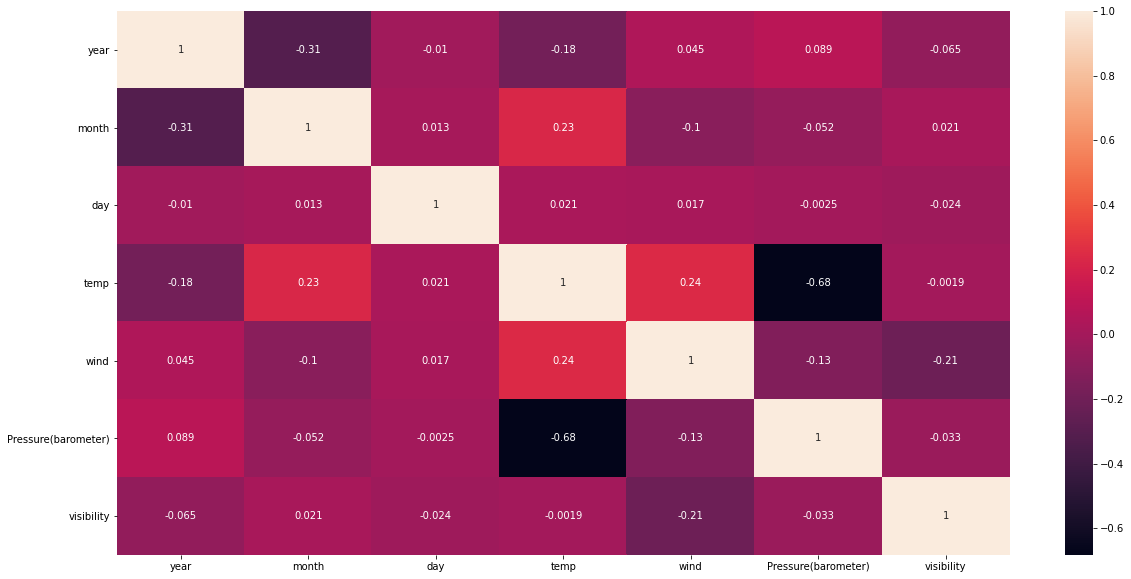

In [38]:
#plotting the correlation
plt.figure(figsize  =(20,10))
sns.heatmap(data.corr(method ='pearson'),annot=True)
plt.show()

## <h1><a id="32" style="color:teal">Data Visualization</a></h1>

Text(0.5, 1.0, 'temperature by city')

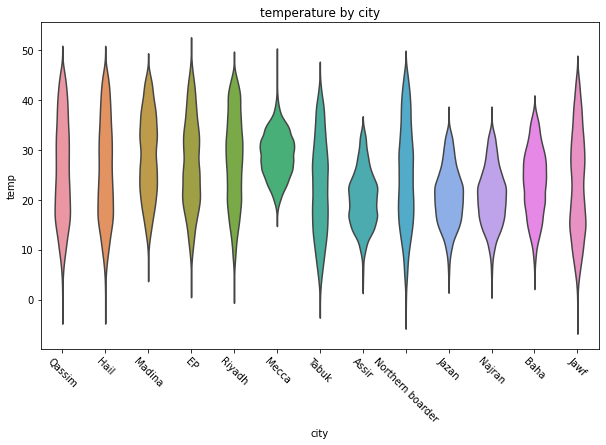

In [39]:
plt.figure(figsize=(10,6))
sns.violinplot(x='city',
               y='temp', 
               data=data, 
               inner=None, 
               )
plt.xticks(rotation=-45)
plt.title('temperature by city')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'temperature kernel density')

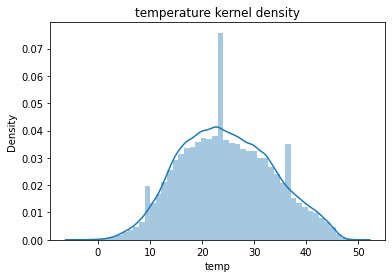

In [40]:
sns.distplot(data.temp)
plt.title('temperature kernel density')

Text(0.5, 1.0, 'the relation between wind and temperature')

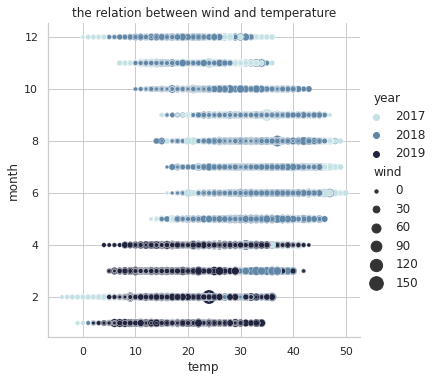

In [41]:
sns.set(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="temp", y="month",
    hue="year", size="wind",
    palette=cmap, sizes=(10, 200),
    color = "red"
)
plt.title('the relation between wind and temperature')

Text(0.5, 1.0, 'weather state in 2017')

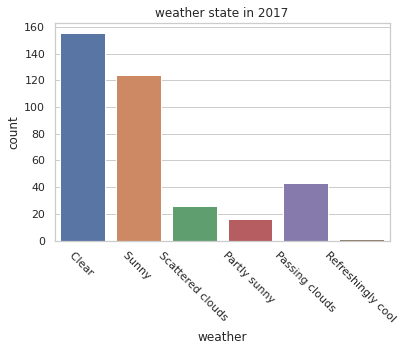

In [42]:
df = pd.read_csv('weather-sa-2017-2019-clean.csv', nrows=365)
sns.countplot(x='weather', data=df)
plt.xticks(rotation=-45)
plt.title('weather state in 2017')

Text(0.5, 1.0, 'yearly recording')

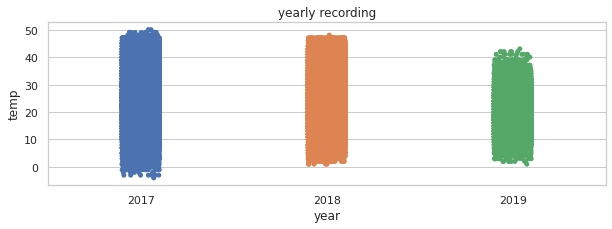

In [43]:
plt.figure(figsize=(10,3))
sns.stripplot(x="year",y="temp", data=data);
plt.title('yearly recording')

Text(0.5, 1.0, 'full-scale dataset analysis by cities')

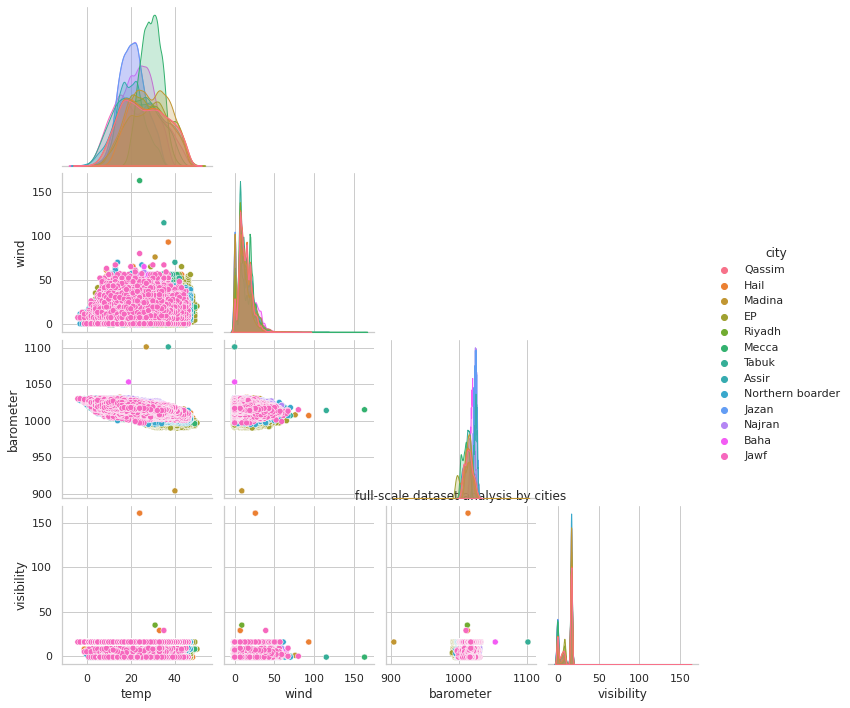

In [44]:
tdf = pd.read_csv('weather-sa-2017-2019-clean.csv', usecols=['city', 'visibility', 'wind', 'temp', 'barometer'])
sns.pairplot(tdf, corner= True, hue='city')
plt.title('full-scale dataset analysis by cities')

# <h1><a id="4" style="color:teal">IV. PREDICTING APPERANT TEMPERATURE</a></h1>

### <Li style="list-style-type: square"><span style="color: teal">Statement:</span></Li>
<li>Build a linear regression model taking the selected features through feature engineering</li>
<li>Predict the apparent temp for the split test data(Use 30% of the data for test)</li>

## <span style="color:teal">We are splitting the data into two parts i.e. 70% of the data is gonna be in the training model and the 30% of the data is going to be in the testing model and will predict the Apparent Temperature.</span>

In [45]:
# taking 70% of the data for training 
jun2017 = idata['2017-01-01':'2017-07-20']
jun2017

,city,time,year,month,day,hour,minute,temp,wind,humidity,Pressure(barometer),visibility
date,,,,,,,,,,,,
2017-01-01,Qassim,2020-11-17 00:00:00,2017,1,1,1970-01-01 00:00:00.000000024,1970-01-01,17,11,64%,1018.0,16
2017-01-01,Hail,2020-11-17 00:00:00,2017,1,1,1970-01-01 00:00:00.000000024,1970-01-01,17,11,64%,1018.0,16
2017-01-01,Madina,2020-11-17 00:00:00,2017,1,1,1970-01-01 00:00:00.000000024,1970-01-01,21,0,33%,1020.0,16
2017-01-01,EP,2020-11-17 00:00:00,2017,1,1,1970-01-01 00:00:00.000000024,1970-01-01,16,0,72%,1015.0,16
2017-01-01,Mecca,2020-11-17 00:00:00,2017,1,1,1970-01-01 00:00:00.000000024,1970-01-01,22,7,69%,1016.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-20,Northern boarder,2020-11-17 23:00:00,2017,7,20,1970-01-01 00:00:00.000000023,1970-01-01,35,7,11%,1003.0,16
2017-07-20,Jazan,2020-11-17 23:00:00,2017,7,20,1970-01-01 00:00:00.000000023,1970-01-01,23,0,57%,1018.0,9
2017-07-20,Najran,2020-11-17 23:00:00,2017,7,20,1970-01-01 00:00:00.000000023,1970-01-01,23,13,53%,1020.0,8


In [46]:
July2017 = idata['2017-07-21':'2017-12-31']
July2017

,city,time,year,month,day,hour,minute,temp,wind,humidity,Pressure(barometer),visibility
date,,,,,,,,,,,,
2017-07-21,Qassim,2020-11-17 00:00:00,2017,7,21,1970-01-01 00:00:00.000000024,1970-01-01,34,13,16%,1004.0,16
2017-07-21,Hail,2020-11-17 00:00:00,2017,7,21,1970-01-01 00:00:00.000000024,1970-01-01,34,13,16%,1004.0,16
2017-07-21,Madina,2020-11-17 00:00:00,2017,7,21,1970-01-01 00:00:00.000000024,1970-01-01,38,11,11%,1007.0,16
2017-07-21,EP,2020-11-17 00:00:00,2017,7,21,1970-01-01 00:00:00.000000024,1970-01-01,32,0,49%,994.0,16
2017-07-21,Riyadh,2020-11-17 00:00:00,2017,7,21,1970-01-01 00:00:00.000000024,1970-01-01,33,0,13%,1002.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,Northern boarder,2020-11-17 23:00:00,2017,12,31,1970-01-01 00:00:00.000000023,1970-01-01,18,20,21%,1012.0,16
2017-12-31,Jazan,2020-11-17 23:00:00,2017,12,31,1970-01-01 00:00:00.000000023,1970-01-01,13,0,82%,1024.0,16
2017-12-31,Najran,2020-11-17 23:00:00,2017,12,31,1970-01-01 00:00:00.000000023,1970-01-01,13,0,19%,1026.0,16


In [47]:
#taking cols for training the model
X_train = jun2017[['temp','humidity','wind', 'Pressure(barometer)','visibility']]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58561 entries, 2017-01-01 to 2017-07-20
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 58561 non-null  int64  
 1   humidity             58561 non-null  object 
 2   wind                 58561 non-null  int64  
 3   Pressure(barometer)  58561 non-null  float64
 4   visibility           58561 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.7+ MB


In [48]:
Y_train = jun2017['temp']
Y_train

date
2017-01-01    17
2017-01-01    17
2017-01-01    21
2017-01-01    16
2017-01-01    22
              ..
2017-07-20    35
2017-07-20    23
2017-07-20    23
2017-07-20    27
2017-07-20    36
Name: temp, Length: 58561, dtype: int64

In [49]:
# Train the model using the training sets
X = X_train.apply(pd.to_numeric, errors='coerce')
Y = Y_train.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

In [50]:
regr = linear_model.LinearRegression()

regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
#taking cols for testing
X_test = July2017[['temp','humidity','wind', 'Pressure(barometer)','visibility']]
X_test

,temp,humidity,wind,Pressure(barometer),visibility
date,,,,,
2017-07-21,34,16%,13,1004.0,16
2017-07-21,34,16%,13,1004.0,16
2017-07-21,38,11%,11,1007.0,16
2017-07-21,32,49%,0,994.0,16
2017-07-21,33,13%,0,1002.0,16
...,...,...,...,...,...
2017-12-31,18,21%,20,1012.0,16
2017-12-31,13,82%,0,1024.0,16
2017-12-31,13,19%,0,1026.0,16


In [52]:
Y_test = July2017['temp']
Y_test

date
2017-07-21    34
2017-07-21    34
2017-07-21    38
2017-07-21    32
2017-07-21    33
              ..
2017-12-31    18
2017-12-31    13
2017-12-31    13
2017-12-31    16
2017-12-31    17
Name: temp, Length: 50036, dtype: int64

In [53]:
XX = X_test.apply(pd.to_numeric, errors='coerce')
YY = Y_test.apply(pd.to_numeric, errors='coerce')
XX.fillna(0, inplace=True)
YY.fillna(0, inplace=True)

In [54]:
#predicting the Temperature
y_pred = regr.predict(XX)

In [55]:
regr.score(XX,YY)

1.0

## Showing the Actual Temperature and the predicted Temperature 

In [56]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
date,,
2017-07-21,34,34.0
2017-07-21,34,34.0
2017-07-21,38,38.0
2017-07-21,32,32.0
2017-07-21,33,33.0
...,...,...
2017-12-31,18,18.0
2017-12-31,13,13.0
2017-12-31,13,13.0


# Visualizing the Result

In [57]:
idx = np.random.choice(X_test.shape[0])
print("Predicted temp :", y_pred[idx])
print("Actual temp :", Y_test[idx])
print("R2 Score :")
r2_score(Y_test, y_pred)

Predicted temp : 17.999999999999996
Actual temp : 18
R2 Score :


1.0

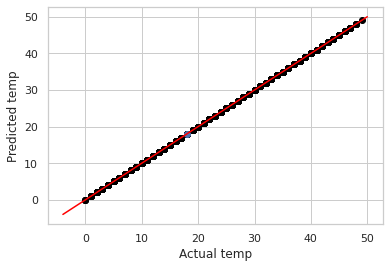

In [58]:
plt.scatter(Y_test, y_pred,  color='black')
plt.scatter( Y_test[idx], y_pred[idx])
plt.plot([data['temp'].min(), data['temp'].max()], [data['temp'].min(), data['temp'].max()], color='red')
plt.xlabel('Actual temp')
plt.ylabel('Predicted temp')
plt.show()

## Calculating the error in prediction 

In [59]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  4.0089999315526615e-15
Mean Squared Error:  3.9370701045823203e-29
Root Mean Squared Error:  6.274607640787048e-15


# <h1><a id="5" style="color:teal">V. SUMMARY</a></h1>

## In this project i have done the following:
### 1. Performed data cleaning using pandas library. Which includes replacing the miscoded information and handling missing data.
### 2. Made a Exploratory Data Analysis on the data using pandas.
### 3. Visualized distributions and correlation of features using seaborn and pandas.
### 4. Built a linear regression model taking the selected features through feature engineering.
### 5. Predicted the temp for the split test data(Use 30% of the data for test) 